In [4]:
import pandas as pd

df = pd.read_csv("spotify.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df['is_hit'] = df['popularity'] >= 60
y_hit = df['is_hit'].astype(int)

X = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'is_hit', 'popularity'])

X_train, X_test, y_train, y_test = train_test_split(X, y_hit, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Flop", "Hit"]))

              precision    recall  f1-score   support

        Flop       0.84      0.88      0.86       725
         Hit       0.84      0.79      0.82       569

    accuracy                           0.84      1294
   macro avg       0.84      0.84      0.84      1294
weighted avg       0.84      0.84      0.84      1294



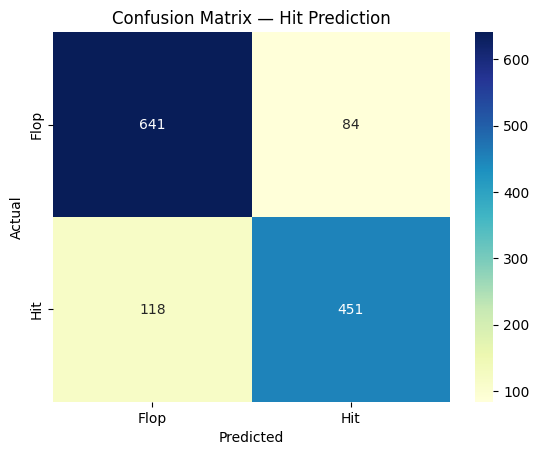

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Hit Prediction")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()
feature_cols = df_copy.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'is_hit', 'popularity']).columns

scaler = StandardScaler()
scaler.fit(df_copy[feature_cols])

song_input = input("Enter song name: ").strip().lower()

matches = df_copy[df_copy['track_name'].str.lower() == song_input]

if matches.empty:
    print("Song not found in the dataset.")
else:
    if len(matches) > 1:
        print("Multiple versions of the song found:")
        for i, row in matches.iterrows():
            print(f"- {row['track_name']} by {row['artists']}")

        artist_input = input("Enter artist name to match: ").strip().lower()
        filtered = matches[matches['artists'].str.lower().str.contains(artist_input)]

        if filtered.empty:
            print("No match for that artist.")
        else:
            song_row = filtered.iloc[0]
    else:
        song_row = matches.iloc[0]

    if 'song_row' in locals():
        song_features = song_row[feature_cols].values.reshape(1, -1)
        song_scaled = scaler.transform(song_features)

        pred = clf.predict(song_scaled)[0]
        prob = clf.predict_proba(song_scaled)[0][1]

        result = "Hit" if pred == 1 else "Flop"
        print(f"\nSong: {song_row['track_name']} — {song_row['artists']}")
        print(f"Prediction: {result}")
        print(f"Confidence (Hit Probability): {prob:.2f}")


Multiple versions of the song found:
- Let Me Down Slowly by fenekot
- Let Me Down Slowly by Alec Benjamin

🎵 Song: Let Me Down Slowly — Alec Benjamin
Prediction: Hit
Confidence (Hit Probability): 0.53


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
